# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import io

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


Read .csv file using python library

In [2]:
H1B_visa = pd.read_csv('C:\my files\Machine_learning_internship\Main_project\H-1B_Disclosure_Data_FY2019.csv',low_memory=False)

Check the no.of rows and columns in the csv file

In [3]:
H1B_visa.shape

(664616, 260)

Print the data using display option Onother hand, use .head for first five set or .tail for last five set of matrix data

In [4]:
H1B_visa.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,04/08/2016,04/30/2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,07/14/2017,05/13/2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,08/23/2017,04/30/2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,12/22/2017,08/20/2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,01/10/2018,04/15/2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis 

In VISA_CLASS, First condition has focusing H1B Visa for united states of America.
So, here drop the rows which is not belongs to H1B visa.
The following command excute  and keep necessary rows.

In [5]:
H1B_visa = H1B_visa[H1B_visa.VISA_CLASS == 'H-1B']
H1B_visa = H1B_visa[H1B_visa.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']
H1B_visa = H1B_visa[H1B_visa.CASE_STATUS != 'WITHDRAWN']
H1B_visa = H1B_visa[H1B_visa.CASE_STATUS != 'CERTIFIED-WITHDRAWN']


In [6]:
H1B_visa.shape

(583774, 260)

Now considering recommended features for the further EDA assessment arranging useful columns from the above conditioned data.

In [7]:
select_columns = ['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','JOB_TITLE','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER','AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_RATE_OF_PAY_TO_1','WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']
H1B_visa = H1B_visa[select_columns]

In [8]:
H1B_visa.shape

(583774, 22)

In [9]:
H1B_visa.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
24,CERTIFIED,H-1B,FANTUAN GROUP INC,Y,NaN,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,...,0,0,N,NaN,N,33.0,NaN,Hour,1.0,NaN
26,CERTIFIED,H-1B,TPUSA-FHCS,Y,NaN,ADVERTISING AND PROMOTIONS DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,56142.0,0,...,1,0,N,NaN,N,99000.0,NaN,Year,1.0,NaN
47,CERTIFIED,H-1B,UNIVERSITY OF TEXAS AT DALLAS,N,NaN,PROGRAM MANAGER I,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,611310.0,0,...,0,0,N,NaN,N,67500.0,NaN,Year,1.0,55370.0
52,CERTIFIED,H-1B,"ZENITH MEDIA SERVICES, INC.",Y,NaN,ASSOCIATE STRATEGY DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541830.0,1,...,0,0,N,NaN,N,102000.0,NaN,Year,1.0,94806.0
54,CERTIFIED,H-1B,APPLE INC.,Y,NaN,ADVERTISING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,...,0,0,N,NaN,N,97781.0,NaN,Year,50.0,97781.0


In [10]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583774 entries, 24 to 664615
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  583774 non-null  object 
 1   VISA_CLASS                   583774 non-null  object 
 2   EMPLOYER_NAME                583770 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  583769 non-null  object 
 4   SECONDARY_ENTITY_1           534017 non-null  object 
 5   JOB_TITLE                    583774 non-null  object 
 6   SOC_TITLE                    583770 non-null  object 
 7   SOC_CODE                     583770 non-null  object 
 8   NAICS_CODE                   583773 non-null  float64
 9   CONTINUED_EMPLOYMENT         583774 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   583774 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    583773 non-null  float64
 12  CHANGE_EMPLOYER              583774 non-null  int64  
 13

# Data visualisation

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

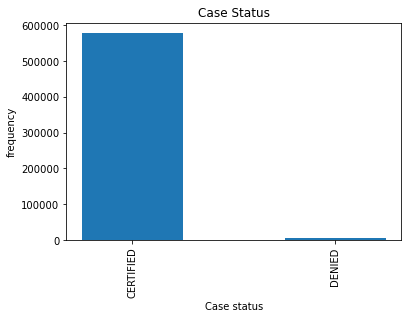

In [11]:
H1B_visa.CASE_STATUS.value_counts()
plt.bar(H1B_visa['CASE_STATUS'].value_counts().index, H1B_visa['CASE_STATUS'].value_counts(), width= 0.5, bottom=None , align='center', data=H1B_visa)
plt.title('Case Status')
plt.xlabel('Case status')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='JOB_TITLE'>

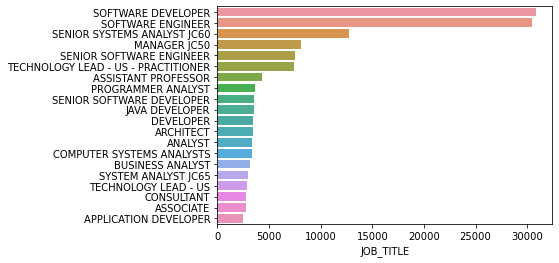

In [12]:
H1B_visa['JOB_TITLE'].value_counts()[:20]
sns.barplot(x = H1B_visa['JOB_TITLE'].value_counts()[:20], y = H1B_visa['JOB_TITLE'].value_counts().index[:20])

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

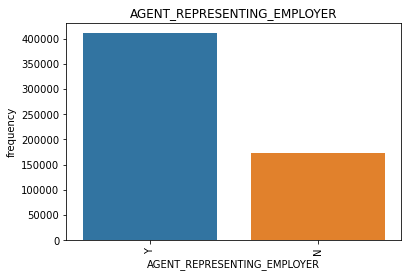

In [13]:
H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20]
sns.barplot(x = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts().index[:20], y = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20])
plt.title('AGENT_REPRESENTING_EMPLOYER')
plt.xlabel('AGENT_REPRESENTING_EMPLOYER')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='EMPLOYER_NAME'>

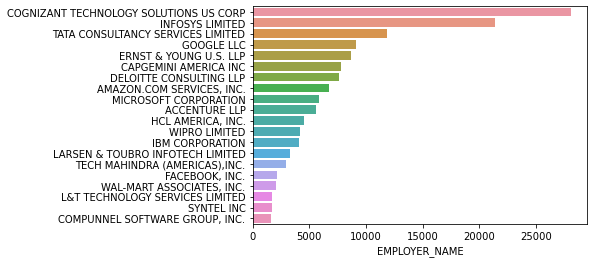

In [14]:
H1B_visa['EMPLOYER_NAME'].value_counts()
sns.barplot(x = H1B_visa['EMPLOYER_NAME'].value_counts()[:20], y = H1B_visa['EMPLOYER_NAME'].value_counts().index[:20])

<AxesSubplot:xlabel='WAGE_RATE_OF_PAY_TO_1', ylabel='Count'>

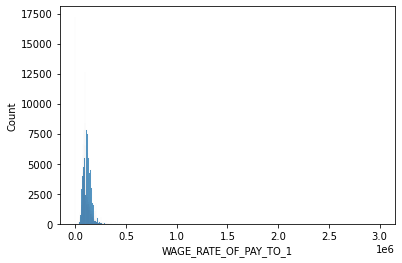

In [15]:
H1B_visa['WAGE_RATE_OF_PAY_TO_1'].value_counts()
sns.histplot(H1B_visa['WAGE_RATE_OF_PAY_TO_1'])

<AxesSubplot:>

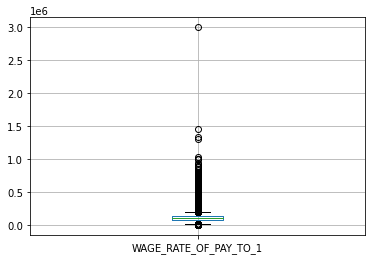

In [16]:
H1B_visa.boxplot(column='WAGE_RATE_OF_PAY_TO_1')


In [17]:
q1 = H1B_visa["WAGE_RATE_OF_PAY_TO_1"].quantile(0.2)
q3 = H1B_visa["WAGE_RATE_OF_PAY_TO_1"].quantile(0.8)
IQR = q3 - q1
mean = H1B_visa['WAGE_RATE_OF_PAY_TO_1'].mean()

In [18]:
H1B_visa['WAGE_RATE_OF_PAY_TO_1'] = H1B_visa['WAGE_RATE_OF_PAY_TO_1'].apply(lambda x: x if x != None and (x <= q1 + 1.5*IQR and x >= q1 - 1.5*IQR) else mean)

<Figure size 1440x1440 with 0 Axes>

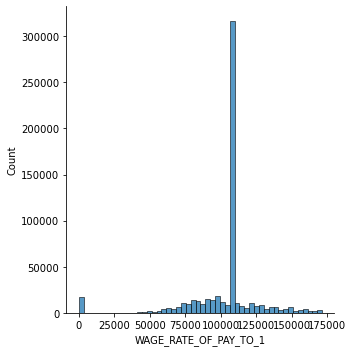

In [19]:
plt.figure(figsize=(20,20))
sns.displot(H1B_visa['WAGE_RATE_OF_PAY_TO_1'], bins = 50)

In [20]:
H1B_visa['WAGE_RATE_OF_PAY_TO_1'].dropna(inplace= True)

<Figure size 1440x1440 with 0 Axes>

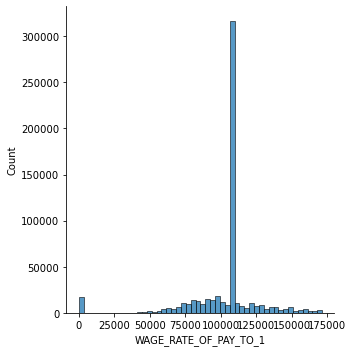

In [21]:
plt.figure(figsize=(20,20))
sns.displot(H1B_visa['WAGE_RATE_OF_PAY_TO_1'], bins = 50)

In [22]:
H1B_visa.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       4
AGENT_REPRESENTING_EMPLOYER         5
SECONDARY_ENTITY_1              49757
JOB_TITLE                           0
SOC_TITLE                           4
SOC_CODE                            4
NAICS_CODE                          1
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                     20
SUPPORT_H1B                    365249
WILLFUL_VIOLATOR                   20
WAGE_RATE_OF_PAY_FROM_1             4
WAGE_RATE_OF_PAY_TO_1               0
WAGE_UNIT_OF_PAY_1                  4
TOTAL_WORKER_POSITIONS              1
PREVAILING_WAGE_1                4678
dtype: int64

In [23]:
#H1B_visa['EMPLOYER_NAME'] = H1B_visa['EMPLOYER_NAME'].fillna(H1B_visa['EMPLOYER_NAME'].mode()[0])
#H1B_visa['AGENT_REPRESENTING_EMPLOYER'] = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].fillna(H1B_visa['AGENT_REPRESENTING_EMPLOYER'].mode()[0])
#H1B_visa['SECONDARY_ENTITY_1'] = H1B_visa['SECONDARY_ENTITY_1'].fillna(H1B_visa['SECONDARY_ENTITY_1'].mode()[0])
#H1B_visa['SOC_CODE'] = H1B_visa['SOC_CODE'].fillna(H1B_visa['SOC_CODE'].mode()[0])
#H1B_visa['NAICS_CODE'] = H1B_visa['NAICS_CODE'].fillna(H1B_visa['NAICS_CODE'].mode()[0])
#H1B_visa['SOC_TITLE'] = H1B_visa['SOC_TITLE'].fillna(H1B_visa['SOC_TITLE'].mode()[0])
#H1B_visa['H-1B_DEPENDENT'] = H1B_visa['H-1B_DEPENDENT'].fillna(H1B_visa['H-1B_DEPENDENT'].mode()[0])
#H1B_visa['WILLFUL_VIOLATOR'] = H1B_visa['WILLFUL_VIOLATOR'].fillna(H1B_visa['WILLFUL_VIOLATOR'].mode()[0])
#H1B_visa['NEW_CONCURRENT_EMPLOYMENT'] = H1B_visa['NEW_CONCURRENT_EMPLOYMENT'].fillna(H1B_visa['NEW_CONCURRENT_EMPLOYMENT'].mode()[0])
#H1B_visa['WAGE_RATE_OF_PAY_TO_1'] = H1B_visa['WAGE_RATE_OF_PAY_TO_1'].fillna(H1B_visa['WAGE_RATE_OF_PAY_TO_1'].median()[0])
#H1B_visa['WAGE_UNIT_OF_PAY_1'] = H1B_visa['WAGE_UNIT_OF_PAY_1'].fillna(H1B_visa['WAGE_UNIT_OF_PAY_1'].mode()[0])
#H1B_visa['TOTAL_WORKER_POSITIONS'] = H1B_visa['TOTAL_WORKER_POSITIONS'].fillna(H1B_visa['TOTAL_WORKER_POSITIONS'].mode()[0])

In [24]:
H1B_visa =H1B_visa.dropna(subset = ['EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS'])


In [25]:
H1B_visa.describe()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
count,533985.000000,533985.000000,533985.000000,533985.000000,533985.000000,5.339850e+05,533985.000000,533985.000000,533985.000000
mean,451557.398698,0.115132,0.011442,0.259292,0.211300,9.335849e+04,102241.850950,1.602075,84020.644733
std,188768.588059,0.923191,0.172732,1.137294,0.817758,4.577030e+04,26497.363545,4.099092,35358.795125
min,31.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+00,0.000000,1.000000,7.250000
25%,454111.000000,0.000000,0.000000,0.000000,0.000000,7.342400e+04,97000.000000,1.000000,68786.000000
50%,541511.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+04,107447.860429,1.000000,83928.000000
75%,541512.000000,0.000000,0.000000,0.000000,0.000000,1.130000e+05,107447.860429,1.000000,101837.000000
max,928120.000000,338.000000,10.000000,54.000000,35.000000,1.870000e+06,171300.000000,500.000000,506424.000000


<AxesSubplot:>

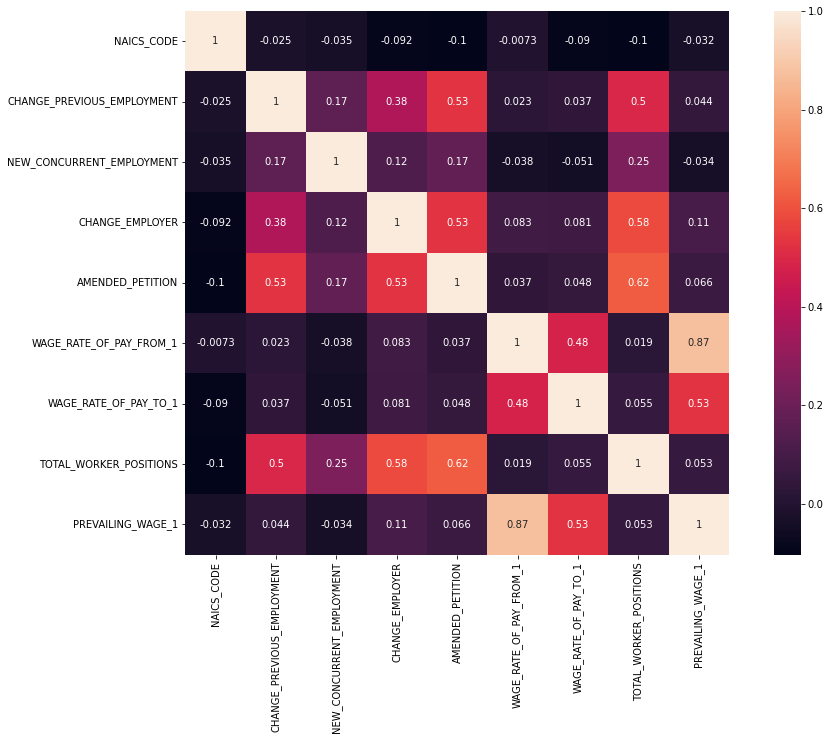

In [26]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(H1B_visa.corr(),vmax=1,square=True ,annot = True)

In [27]:
H1B_visa.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       0
AGENT_REPRESENTING_EMPLOYER         0
SECONDARY_ENTITY_1                  0
JOB_TITLE                           0
SOC_TITLE                           0
SOC_CODE                            0
NAICS_CODE                          0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                      0
SUPPORT_H1B                    335440
WILLFUL_VIOLATOR                    0
WAGE_RATE_OF_PAY_FROM_1             0
WAGE_RATE_OF_PAY_TO_1               0
WAGE_UNIT_OF_PAY_1                  0
TOTAL_WORKER_POSITIONS              0
PREVAILING_WAGE_1                   0
dtype: int64

In [28]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533985 entries, 72 to 664610
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  533985 non-null  object 
 1   VISA_CLASS                   533985 non-null  object 
 2   EMPLOYER_NAME                533985 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  533985 non-null  object 
 4   SECONDARY_ENTITY_1           533985 non-null  object 
 5   JOB_TITLE                    533985 non-null  object 
 6   SOC_TITLE                    533985 non-null  object 
 7   SOC_CODE                     533985 non-null  object 
 8   NAICS_CODE                   533985 non-null  float64
 9   CONTINUED_EMPLOYMENT         533985 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   533985 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    533985 non-null  float64
 12  CHANGE_EMPLOYER              533985 non-null  int64  
 13

In [29]:
H1B_visa.SUPPORT_H1B.value_counts(dropna = False)

NaN    335440
Y      197127
N        1418
Name: SUPPORT_H1B, dtype: int64

In [30]:
H1B_visa.SECONDARY_ENTITY_1.value_counts(dropna = False)


N    321369
Y    212616
Name: SECONDARY_ENTITY_1, dtype: int64

In [31]:
H1B_visa.PREVAILING_WAGE_1.value_counts(dropna = False)

109242.00    7296
96366.00     6604
93538.00     4639
113318.00    4046
84240.00     3388
             ... 
37101.00        1
60681.00        1
83693.00        1
22.12           1
54837.00        1
Name: PREVAILING_WAGE_1, Length: 23517, dtype: int64

In [32]:
mode1 = H1B_visa['SUPPORT_H1B'].mode().values[0]
mode2 = H1B_visa['SECONDARY_ENTITY_1'].mode().values[0]
#mode2 = H1B_visa['SECONDARY_ENTITY_1'].mean().values[0]

H1B_visa['SUPPORT_H1B'] = H1B_visa['SUPPORT_H1B'].replace(np.nan,mode1)
H1B_visa['SECONDARY_ENTITY_1'] = H1B_visa['SECONDARY_ENTITY_1'].replace(np.nan,mode2)

<AxesSubplot:>

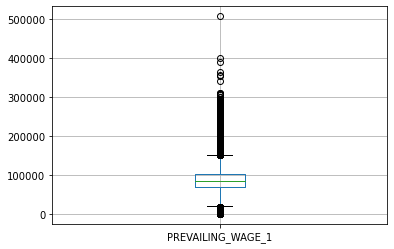

In [33]:
H1B_visa.boxplot(column='PREVAILING_WAGE_1')

<Figure size 1440x1440 with 0 Axes>

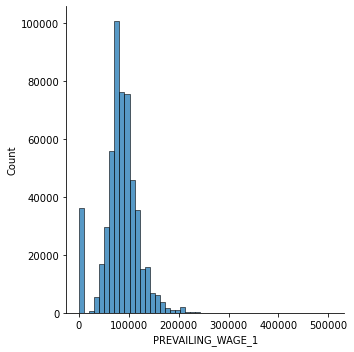

In [34]:
plt.figure(figsize=(20,20))
sns.displot(H1B_visa['PREVAILING_WAGE_1'], bins = 50)


In [35]:
q1 = H1B_visa["PREVAILING_WAGE_1"].quantile(0.1)
q3 = H1B_visa["PREVAILING_WAGE_1"].quantile(0.8)
IQR = q3 - q1
mean = H1B_visa['PREVAILING_WAGE_1'].mean()

In [36]:
H1B_visa['PREVAILING_WAGE_1'] = H1B_visa['PREVAILING_WAGE_1'].apply(lambda x: x if x != None and (x <= q1 + 1.5*IQR and x >= q1 - 1.5*IQR) else mean)

<Figure size 1440x1440 with 0 Axes>

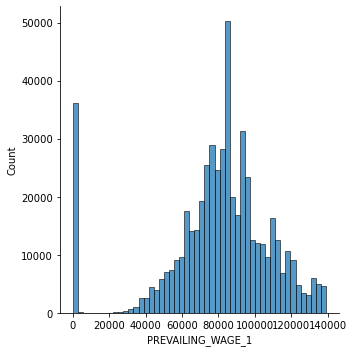

In [37]:
plt.figure(figsize=(20,20))
sns.displot(H1B_visa['PREVAILING_WAGE_1'], bins = 50)


<AxesSubplot:>

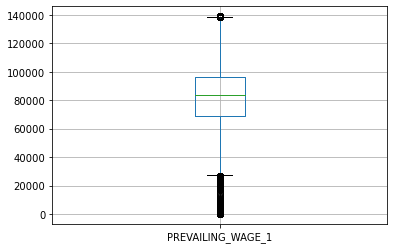

In [38]:
#H1B_visa['PREVAILING_WAGE_1']
H1B_visa.boxplot(column='PREVAILING_WAGE_1')

In [39]:
#H1B_visa = H1B_visa.drop(H1B_visa.loc[H1B_visa['PREVAILING_WAGE_1'].isnull()].index)

In [40]:
H1B_visa.isnull().sum()

CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYER_NAME                  0
AGENT_REPRESENTING_EMPLOYER    0
SECONDARY_ENTITY_1             0
JOB_TITLE                      0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_RATE_OF_PAY_TO_1          0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
PREVAILING_WAGE_1              0
dtype: int64

In [41]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533985 entries, 72 to 664610
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  533985 non-null  object 
 1   VISA_CLASS                   533985 non-null  object 
 2   EMPLOYER_NAME                533985 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  533985 non-null  object 
 4   SECONDARY_ENTITY_1           533985 non-null  object 
 5   JOB_TITLE                    533985 non-null  object 
 6   SOC_TITLE                    533985 non-null  object 
 7   SOC_CODE                     533985 non-null  object 
 8   NAICS_CODE                   533985 non-null  float64
 9   CONTINUED_EMPLOYMENT         533985 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   533985 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    533985 non-null  float64
 12  CHANGE_EMPLOYER              533985 non-null  int64  
 13

In [42]:
duplicate =H1B_visa.duplicated()
print(duplicate.sum())
H1B_visa[duplicate]

113290


,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
139,CERTIFIED,H-1B,INDUSTRY CREATIVE LLC,Y,N,ACCOUNT DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541490.0,0,...,0,0,N,Y,N,90000.00,107447.860429,Year,1.0,75046.000000
173,CERTIFIED,H-1B,SUNGWON ANNANDALE LLC,Y,N,MARKETING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,445110.0,0,...,0,0,N,Y,N,46.00,107447.860429,Hour,1.0,45.240000
196,CERTIFIED,H-1B,FACEBOOK INC.,Y,N,"CREATIVE DIRECTOR, INSTAGRAM",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,518112.0,0,...,0,0,Y,Y,N,178746.72,107447.860429,Year,1.0,84020.644733
207,CERTIFIED,H-1B,ENERGY BBDO INC.,Y,N,ACCOUNT EXECUTIVE,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,...,0,0,N,Y,N,48000.00,107447.860429,Year,1.0,47549.000000
265,CERTIFIED,H-1B,"LAFAYETTE 148, INC.",Y,N,MERCHANDISING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541490.0,1,...,0,0,N,Y,N,136500.00,107447.860429,Year,1.0,136178.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664363,CERTIFIED,H-1B,NUTRA-MED PACKAGING INC,Y,N,QUALITY ASSURANCE SUPERVISOR,FIRST-LINE SUPERVISORS OF PRODUCTION AND OPERA...,51-1011,561910.0,1,...,0,0,N,Y,N,73000.00,107447.860429,Year,1.0,72134.000000
664584,CERTIFIED,H-1B,"MARLIN ENGINEERING, INC.",Y,N,TRAFFIC ENGINEER,TRAFFIC TECHNICIANS,53-6041,541330.0,0,...,0,0,N,Y,N,63000.00,107447.860429,Year,1.0,42515.000000
664599,CERTIFIED,H-1B,"EVEREST CONSULTANTS, INC.",Y,N,MARINE CONSULTANT SURVEYOR,TRANSPORTATION INSPECTORS,53-6051,541690.0,0,...,0,0,N,Y,N,31866.00,107447.860429,Year,1.0,31866.000000
664603,CERTIFIED,H-1B,AMSPEC LLC,Y,N,PETROLEUM INSPECTOR,TRANSPORTATION INSPECTORS,53-6051,541380.0,1,...,0,0,N,Y,N,75000.00,107447.860429,Year,1.0,58011.000000


In [43]:
H1B_visa.drop_duplicates(inplace=True)

In [44]:
dpl = H1B_visa.duplicated()
dpl.sum()

0

<AxesSubplot:>

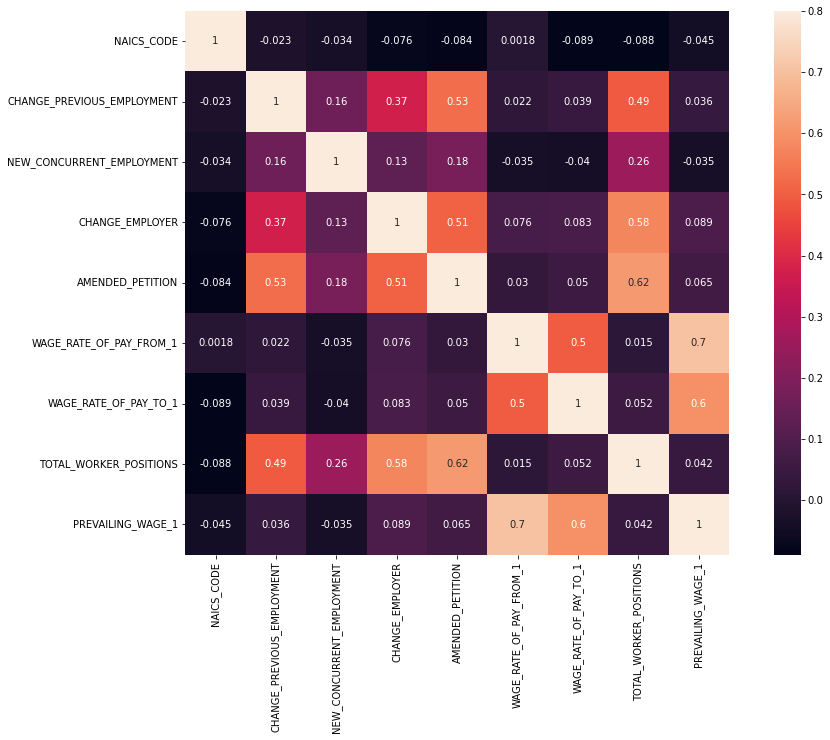

In [45]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(H1B_visa.corr(),vmax=0.8,square=True,annot= True)

In [46]:
H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['EMPLOYER_NAME'].value_counts()[2000:]
#print('EMPLOYER_NAME:\n',H1B_visa.EMPLOYER_NAME.value_counts())

KARMA AUTOMOTIVE, LLC                              1
INTSOURCING, INC                                   1
ELYSIUM CAPITAL VENTURE LLC                        1
MANDAL.AI, INC.                                    1
CHYY (USA), LLC, F/K/A HRC LEASING COMPANY, LLC    1
                                                  ..
EMONICS LLC                                        1
CLICK2CLOUD, INC.                                  1
LEARNBEYOND CONSULTING LLC                         1
SUMERU TECH INC                                    1
PORT LOGISTICS TERMINAL OPERATIONS, LLC            1
Name: EMPLOYER_NAME, Length: 902, dtype: int64

In [47]:
import sys
H1B_visa['EMPLOYER_BRANCH'] = 'OTHERS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DELOITTE|PAYPAL|IBM|INFOSYS|ACCENTURE|APPLE|GOOGLE|CROCS|FACEBOOK|CAPGEMINI|ADOBE|WIPRO|TWITTER|MIND|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA|QUALCOMM')] = 'TOP TECHS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DESIGN|CAPITAL|MORRISON|LEGAL|OATH|HOLDINGS|BLUTAG|INVESTMENTS')] = ' ECOMMERCE & LAW SERVICES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('FURRION|MICROSTRATEGY|HARBOR|ELECTRONIC|MARIX|MICRO|ELECTRO|CHIP|DEVICE|INSTRUMENTS|INTEGRATORS|DELL|HEW|SEMICONDUCTORS|ENTERTAINMENT|LOGIC|LOGISTICS|CONTEXTLOGIC')] = 'ELECTRONIC & LOGISTICS SERVICES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('UNIVERSITY|UNIVERSITIES|ACADEMIC|INSTITUTIONS|SCIENCE|BIOSCIENCE|BIOSCIENCES|NATIONAL|SCHOOL|COLLEGE|INSTITUTE|SCIENTIFIC|LIFE|EDUCATION|ACADEMY|RESEARCH')] = 'UNIVERSITY'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('MASTER|BANK|CARD|VISA|MARKETS')] = 'MARKETS & BANKING COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('PHARMA|NURSING|DOCOTRS|HOSPITAL|ANTHEM|PFIZER|REDBOCK|GOLDMAN|CAREMARK|DIAGNOSTICS|INTUIT|HEALTH|FIN|ECLINICAL WORKS|MEDTRONIC|DESMOND|FINANCIAL|MEDICAL|MED|CENTER|HEALTHCARE|MEDICAL')] = 'FINANCE AND MEDICAL SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('BUSINESS|MANAGEMENT|APPLIED|SURVEYMONKEY|PEGS|FLOORING')] = 'BUSINESS SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('CABLE|COMMUNICATIONS|PRICEWATERHOUSECOOPERS|LABS|COMMUNICATION|COMMUNICATIONS|NETWORK|DIGITAL|NETWORKS|LABORATORY|TELECOM|TEXPERTS')] = 'RESEARCH LABS & NETWORK& MOBILE SERVICES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('AUTODESK|AUTOBILE|AUTOMOTIVE|MOTOR|AUTO|FORD|PUMP|ELECTRICAL|ELECTRIC|TESLA|BOSCH|MACHINERY|CONSTRUCTION|SCIAPS|STEEL|VEHICLES')] = 'CIVIL & AUTOMOTIVE & ELECTRICAL'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('IDEXCEL|PARTNERS|TECHLIGENT|DEVELOPMENT|IT|COMPUTER|CYBER|TECHNOLOGY|TECH|MENSCHFORCE|ACCESS|INFORMATION')] = 'TECH SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('ITCONNECTUS|DATA|CONNECT|SOLUTIONS|WEB|INFOTECH|CLOUD|VISION|GLOBAL|SYSTEMS|TECHNOSOFT|TECHNO|SERVICES|SECURITIES|SECURITY|TECHNOLOGIES|DATA|SOFTWARES|SOFTWARE')] = 'TECH SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('INTERNATIONAL|CONSULTING|CONSULTANT|RESOURCES|GROUP|ASSOCIATES|ANALYSTS|CONSULTANCY|CONSULTANTS')] = 'CONSULTING COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('PRODUCT|PRODUCTS|ENTERPRISE|ENTERPRISES|SEMETRIX')] = 'PRODUCT &MANUFACTURERS &ENTERPRISE COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('U.S.A.|USA|UNITED|STATES|US|AMERICA|U.S.')] = 'USA BASED COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('INDIA|CHINA')] = 'ASIAN BASED COMPANIES'
#H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('CORPORATION|CORP.')] = 'CORPORATE COMPANIES'
#H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('LLC.|LLC,|LLC')] = 'LLC COMPANIES'


C:\Users\User\AppData\Local\Temp\ipykernel_10156\3754980260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DELOITTE|PAYPAL|IBM|INFOSYS|ACCENTURE|APPLE|GOOGLE|CROCS|FACEBOOK|CAPGEMINI|ADOBE|WIPRO|TWITTER|MIND|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA|QUALCOMM')] = 'TOP TECHS'
C:\Users\User\AppData\Local\Temp\ipykernel_10156\3754980260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DESIGN|CAPITAL|MORRISON|LEGAL|OATH|HOLDINGS|BLUTAG|INVESTMENTS')] = ' EC

In [48]:
H1B_visa['EMPLOYER_BRANCH'].value_counts()

TECH SOLUTIONS                                  144698
OTHERS                                          106774
USA BASED COMPANIES                              62195
CONSULTING COMPANIES                             39925
TOP TECHS                                        22136
FINANCE AND MEDICAL SOLUTIONS                    12175
ELECTRONIC & LOGISTICS SERVICES                   7038
RESEARCH LABS & NETWORK& MOBILE SERVICES          5195
UNIVERSITY                                        4895
CIVIL & AUTOMOTIVE & ELECTRICAL                   4533
PRODUCT &MANUFACTURERS &ENTERPRISE COMPANIES      3209
BUSINESS SOLUTIONS                                2740
MARKETS & BANKING COMPANIES                       1760
ASIAN BASED COMPANIES                             1714
 ECOMMERCE & LAW SERVICES                         1708
Name: EMPLOYER_BRANCH, dtype: int64

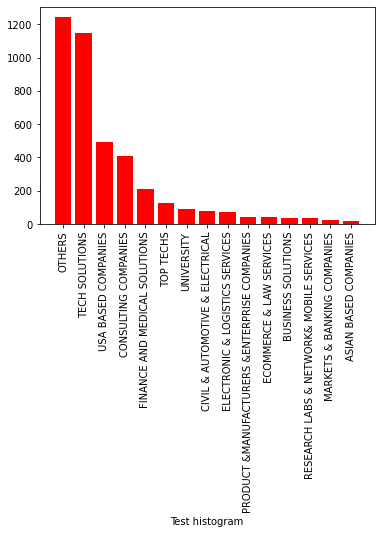

In [49]:
#z1 = H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['EMPLOYER_BRANCH'].value_counts()
#z2  =H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['EMPLOYER_BRANCH'].value_counts()
#fig, ax1 = plt.subplots()
#ax1.bar(z2,z2.index)
#ax1.bar(z1,z1.index)
#plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
 
#ax.bar(H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['EMPLOYER_BRANCH'].value_counts().index,H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['EMPLOYER_BRANCH'].value_counts(),color='b')
ax.bar(H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['EMPLOYER_BRANCH'].value_counts().index,H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['EMPLOYER_BRANCH'].value_counts(),color='r')

plt.xticks(rotation='vertical')
ax.set_xlabel('Test histogram')
plt.show()

In [50]:
H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['SOC_TITLE'].value_counts()[200:250]
#print('SOC_TITLE:\n',H1B_visa.SOC_TITLE.value_counts())

AGENTS AND BUSINESS MANAGERS OF ARTISTS, PERFORMERS, AND ATHLETES                1
HEALTH TECHNOLOGISTS AND TECHNICIANS, ALL OTHER                                  1
MEETING, CONVENTION, AND EVENT PLANNERS                                          1
ATHLETIC TRAINERS                                                                1
THERAPISTS, ALL OTHER                                                            1
BUYERS AND PURCHASING AGENTS, FARM PRODUCTS                                      1
REHABILITATION COUNSELORS                                                        1
EDUCATION ADMINISTRATORS, ELEMENTARY AND SECONDARY SCHOOL                        1
EDUCATION ADMINISTRATORS, PRESCHOOL AND CHILDCARE CENTER/PROGRAM                 1
HEAVY AND TRACTOR-TRAILER TRUCK DRIVERS                                          1
CHEMICAL PLANT AND SYSTEM OPERATORS                                              1
FOUNDRY MOLD AND COREMAKERS                                                      1
FOOD

In [51]:
import sys
H1B_visa['SOC_TITLE_NEW'] = 'others'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('DESKTOP||HARDWARE|WEB|SOFTWARE|COMPUTER|INFORMATION|SECURITY|DEVELOPERS')] = 'IT ENGINEERS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('HEAVY|CONCRETE|PILOTS|DRAFTERS|AUTOMOTIVE|MECHANICS|INTERIORS|LANDSCAPE|MECHANICAL|DESIGN|MARINE|INDUSTRIAL|MATERIALS|CONSTRUCTION|ARCHITECHTURAL|ARCHITECTS|PETROLEUM')] = 'MECHANICAL & CIVIL'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('SALESPERSONS|INSURANCE|AGENTS|WHOLESALE|RETAIL|CREDIT|SALES|MARKET|COST|ESTIMATORS|MARKETING')] = 'SALES & EXECUTIVES'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('LODGING|DIRECTORS|CHIEF|EXECUTIVES|MANAGEMENT|MANAGERS')] = 'MANAGER'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('BIOINFORMATICS|CHEMISTS|CHEMICAL|BIOCHEMISTS|BIOPHYSICISTS')] = 'CHEMICAL ENGINEERS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('R&D|GEOSCIENTISTS|SPEECH|DATA|LIFE|DATABASE|STATISTICIANS|ACCOUNTANTS|SCIENTISTS')] = 'DATABASE & SCIENTISTS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('BROADCAST|TELECOMMUNICATION|NETWORK|ELECTRONICS|ELECTRICAL|LOGISTICIANS|TRANSPORTATION|STORAGE')] = 'ELECTRONICS ^ LOGISTICS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('ACCOUNTING|ECONOMICS|FINANCIAL|ECONOMISTS|POLITICAL')] = 'FINANCE'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('COUNSELORS|COMPLIANCE|PUBLIC RELATIONS|FUNDRAISING|URBAN|REGIONAL')] = 'P.R & URBAN'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('EDITORS|LAW|PARALEGALS|LEGALS')] = 'ADMINSTRATIVE & LAW'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('AUDIOLOGISTS|ACCOUNTANTS|AUDITORS|COMPLIANCE|ADVERTISING|PROMOTIONS|INTERPRETERS|TRANSLATORS')] = 'AUDIT & ADVERTISEMENT'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('SUPERVISOR|MEDIA|EDITORS|RECRUITERS|FILM|VIDEO|REPORTERS|CORRESPONDENTS|HUMAN|RESOURCES|FASHION|DESIGNERS')] = 'H.R & FASHION'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('HELPERS|FOUNDRY|MAIDS|ENVIRONMENTAL|SOIL|PLANT|MICROBIOLOGISTS|AGRICULTURAL|FARM|CHEFS|COOKS|FARMERS|RANCHERS|RESTAURANT ')] = 'AGRICULTURE & CHEFS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('ATHLETIC|ATHLETES|NATURAL|DEVELOPMENT|TRAINING|EDUCATION|COACHES|SCOUTS|EXERCISE')] = 'EDUCATION & TRAINING'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('OBSTETRICIANS|GYNECOLOGISTS|DENTISTS|DIETITIANS|UTRITIONIST|NURSE|DENTAL|PRACTIONERS|PHYSICIST|GENERAL|THERAPISTS|VETERINARIANS|SURGEONS|PSYCOLOGIST|PHYSIOLOGISTS|PSYCHOLOGY|CHIROPRACTORS|PHARMACY')] = 'MEDICAL'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('EVENT|CONVENTION|ART|DRAMA|MUSIC|TEACHER|WRITERS|TEACHERS|POSTSECONDARY|KINDERGARTEN|ELEMENTARY|SCHOOL|ARTISTS|ANIMATORS|PHYSICS|MATHEMATICIANS|MATHEMATICAL|SOCIAL')] = 'Education'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('UNDERWRITERS|LABORERS|TECHNICIANS|WORKERS|CHEMISTS|BIOCHEMISTS|LIBRARIANS|OPERATORS|ASSISTANTS|WORKERS')] = 'TECHNICIANS'


C:\Users\User\AppData\Local\Temp\ipykernel_10156\2292080180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('DESKTOP||HARDWARE|WEB|SOFTWARE|COMPUTER|INFORMATION|SECURITY|DEVELOPERS')] = 'IT ENGINEERS'
C:\Users\User\AppData\Local\Temp\ipykernel_10156\2292080180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('HEAVY|CONCRETE|PILOTS|DRAFTERS|AUTOMOTIVE|MECHANICS|INTERIORS|LANDSCAPE|MECHANICAL|DESIGN|MARINE|INDUSTRIAL|MATERIALS|CONSTRUCTION|ARCHITECHTURAL|ARCHITECTS|PETROLEUM')] = 'MECHANICAL & 

In [52]:
H1B_visa['SOC_TITLE_NEW'].value_counts()

IT ENGINEERS               265420
DATABASE & SCIENTISTS       26036
MANAGER                     21441
ELECTRONICS ^ LOGISTICS     20795
MECHANICAL & CIVIL          17443
Education                   12734
FINANCE                     11761
MEDICAL                     10296
AUDIT & ADVERTISEMENT        8891
SALES & EXECUTIVES           8122
TECHNICIANS                  6620
H.R & FASHION                4520
AGRICULTURE & CHEFS          1721
ADMINSTRATIVE & LAW          1437
P.R & URBAN                  1296
EDUCATION & TRAINING         1188
CHEMICAL ENGINEERS            974
Name: SOC_TITLE_NEW, dtype: int64

In [53]:
H1B_visa['JOB_TITLE'].value_counts()

SOFTWARE ENGINEER                       20128
SOFTWARE DEVELOPER                      19529
SENIOR SOFTWARE ENGINEER                 5217
ASSISTANT PROFESSOR                      3730
JAVA DEVELOPER                           2726
                                        ...  
SENIOR PRINCIPAL CLOUD ARCHITECT            1
SENIOR MANAGER, FINANCIAL OPERATIONS        1
ERP DEVELOPER/PROGRAMMER                    1
COGNOS BUSINESS SYSTEM ANALYST              1
ACD WRITING                                 1
Name: JOB_TITLE, Length: 94630, dtype: int64

In [54]:
import sys
H1B_visa['JOB_TITLE_NEW'] = 'others'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|HADOOP|INFORMATICA|SQL|BI|SCRUM|VALIDATION|APPLICATIONS|UI|PROGRAMMER|DEVELOPER|SOLUTION|RPA')] = 'IT & SOFTWARE ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('LANDSCAPE|CAD|SITE|FIELD|QUALITY|MECHANICAL DESIGN|STRUCTURAL|DESIGNER|SIMULATION|ENGINEERING|MARINE|INDUSTRIAL|MATERIALS|MECHANICAL|MANUFACTURING|CIVIL')] = 'MECHANICAL & CIVIL ENGINEER '
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ACCOUNTANT|FINANCIAL|QUANTITATIVE|RISK|BUDGET|TAX')] = 'FINANCE TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('PRESIDENT|DIRECTOR|MANAGER')] = 'Manager & DIRECTORS'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ELECTRICAL|CHEMICAL')] = 'ELECTRICAL ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SERVICE|AEM|EMBEDDED|DIGITAL|NETWORK|CONTROLS|HARDWARE|FUNCTIONAL|ELECTRICAL|CHEMICAL')] = 'ELECTRONICS & ELECTRICAL ENGINEERS TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('PUBLIC|LAWYERS|ATTORNEY|LAW')] = 'LAW TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SALESFORCE|MARKET|MARKETING|SUPPLY')] = 'MARKETING TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SPEECH|BIG|ORACLE|MACHINE|DATABASE|DATA|SCIENTIST|ASSOCIATES')] = 'DATABASE & SCIENTISTS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ARCHITECT|ARCHITECTURAL')] = 'ARCHITECT'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('TEACHER|PROFESSOR|POSTDOCTORAL|FELLOW|SCHOLAR|LECTURER|LABORATORY')] = 'EDUCATIONAL ORGANISATION'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('BUSINESS|ADMINISTRATOR|INVESTMENT|ACCOUNT')] = 'BUSINESS TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('DENTIST|HOSPITALIST|THERAPIST|PSYCHIATRIST|PEDIATRICIAN|PHYSICIAN|FAMILY|NEPHROLOGIST')] = 'MEDICAL TEAM'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SENIOR|SR.|SR')] = 'SENIOR TEAM'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ANALYST')] = 'ANALYST TEAM'

C:\Users\User\AppData\Local\Temp\ipykernel_10156\2870454930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
C:\Users\User\AppData\Local\Temp\ipykernel_10156\2870454930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|H

In [55]:
H1B_visa['JOB_TITLE_NEW'].value_counts()


IT & SOFTWARE ENGINEERS                    177301
others                                      66566
Manager & DIRECTORS                         37801
BUSINESS TEAM                               28830
DATABASE & SCIENTISTS                       24113
MECHANICAL & CIVIL ENGINEER                 22438
EDUCATIONAL ORGANISATION                    14995
ARCHITECT                                   14722
ELECTRONICS & ELECTRICAL ENGINEERS TEAM     12470
MEDICAL TEAM                                 7171
MARKETING TEAM                               7100
FINANCE TEAM                                 5866
LAW TEAM                                     1322
Name: JOB_TITLE_NEW, dtype: int64

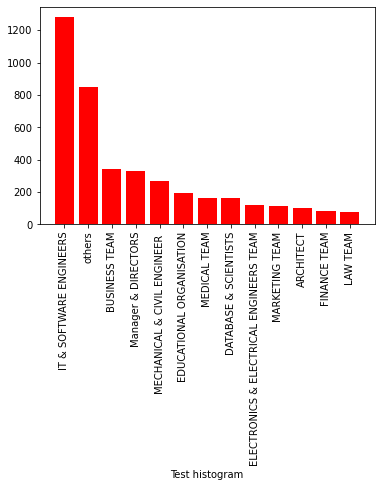

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
#ax.bar(H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['JOB_TITLE_NEW'].value_counts().index,H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['JOB_TITLE_NEW'].value_counts(),color='b')
ax.bar(H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['JOB_TITLE_NEW'].value_counts().index,H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['JOB_TITLE_NEW'].value_counts(),color='r')

plt.xticks(rotation='vertical')
ax.set_xlabel('Test histogram')
plt.show()

In [57]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420695 entries, 72 to 664610
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  420695 non-null  object 
 1   VISA_CLASS                   420695 non-null  object 
 2   EMPLOYER_NAME                420695 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  420695 non-null  object 
 4   SECONDARY_ENTITY_1           420695 non-null  object 
 5   JOB_TITLE                    420695 non-null  object 
 6   SOC_TITLE                    420695 non-null  object 
 7   SOC_CODE                     420695 non-null  object 
 8   NAICS_CODE                   420695 non-null  float64
 9   CONTINUED_EMPLOYMENT         420695 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   420695 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    420695 non-null  float64
 12  CHANGE_EMPLOYER              420695 non-null  int64  
 13

In [58]:
print(H1B_visa.SOC_CODE) 

72        11-2011
73        11-2011
75        11-2011
79        11-2011
84        11-2011
           ...   
664606    53-6051
664607    53-6051
664608    53-6051
664609    53-7021
664610    53-7021
Name: SOC_CODE, Length: 420695, dtype: object


In [59]:
H1B_visa['SOC_CODE'] = H1B_visa['SOC_CODE'].replace(['OPERATIONS RESEARCH ANALYSTS'],'15')
H1B_visa['SOC_CODE_NEW'] = H1B_visa['SOC_CODE'].str.split("-").str[0]
H1B_visa['SOC_CODE_NEW'] = H1B_visa['SOC_CODE_NEW'].replace(['39','35','53','51','47','49','31','33','45','37'],'10 codes lessthan 100')
H1B_visa['SOC_CODE_NEW'].value_counts()

15                       279702
17                        38794
13                        34946
11                        17292
19                        16161
29                        11533
25                        10970
27                         5627
41                         2599
23                         1694
21                          871
10 codes lessthan 100       253
43                          253
Name: SOC_CODE_NEW, dtype: int64

In [60]:
H1B_visa['WAGE_UNIT_OF_PAY_1'].value_counts()

Year         392320
Hour          27957
Month           293
Bi-Weekly        85
Week             40
Name: WAGE_UNIT_OF_PAY_1, dtype: int64

In [61]:
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['001','01'],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['00'],'0')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['02'],'2')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['B'],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['0',],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['25','20','15','6','8','12','30','50','40','18','35','13','7','99','45','17','21','11'],'lower values 100 frequency')
H1B_visa['CONTINUED_EMPLOYMENT'].value_counts()


1                             413290
5                               3172
2                               1919
4                               1137
10                               444
3                                368
lower values 100 frequency       365
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [62]:
H1B_visa.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,EMPLOYER_BRANCH,SOC_TITLE_NEW,JOB_TITLE_NEW,SOC_CODE_NEW
72,CERTIFIED,H-1B,APPLE INC.,Y,N,ACD WRITING,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,1,...,N,154232.00,107447.860429,Year,1.0,84020.644733,TOP TECHS,AUDIT & ADVERTISEMENT,IT & SOFTWARE ENGINEERS,11
73,CERTIFIED,H-1B,"TAOLA, INC.",Y,N,ADVERTISING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,516110.0,1,...,N,47.01,47.010000,Hour,1.0,47.010000,OTHERS,AUDIT & ADVERTISEMENT,Manager & DIRECTORS,11
75,CERTIFIED,H-1B,"PROBOSCIS, INC.",Y,N,DIGITAL ADVERTISING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541512.0,1,...,N,47549.00,47549.000000,Year,1.0,47549.000000,OTHERS,AUDIT & ADVERTISEMENT,ELECTRONICS & ELECTRICAL ENGINEERS TEAM,11
79,CERTIFIED,H-1B,"FACEBOOK, INC.",Y,N,CREATIVE AGENCY PARTNER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,518112.0,1,...,N,214230.00,107447.860429,Year,1.0,84020.644733,TOP TECHS,AUDIT & ADVERTISEMENT,others,11
84,CERTIFIED,H-1B,"SWI-DE, LLC",Y,N,GLOBAL BRAND MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,31222.0,1,...,N,90000.00,110000.000000,Year,1.0,75026.000000,OTHERS,AUDIT & ADVERTISEMENT,Manager & DIRECTORS,11


In [63]:
print(H1B_visa.dtypes)

CASE_STATUS                     object
VISA_CLASS                      object
EMPLOYER_NAME                   object
AGENT_REPRESENTING_EMPLOYER     object
SECONDARY_ENTITY_1              object
JOB_TITLE                       object
SOC_TITLE                       object
SOC_CODE                        object
NAICS_CODE                     float64
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
H-1B_DEPENDENT                  object
SUPPORT_H1B                     object
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_RATE_OF_PAY_TO_1          float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
EMPLOYER_BRANCH                 object
SOC_TITLE_NEW                   object
JOB_TITLE_NEW                   object
SOC_CODE_NEW             

In [64]:
H1B_visa.drop('VISA_CLASS', axis=1, inplace=True) 
H1B_visa.drop('EMPLOYER_NAME', axis=1, inplace=True) 
H1B_visa.drop('JOB_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SOC_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SOC_CODE', axis=1, inplace=True) 



In [65]:
print(H1B_visa.dtypes)

CASE_STATUS                     object
AGENT_REPRESENTING_EMPLOYER     object
SECONDARY_ENTITY_1              object
NAICS_CODE                     float64
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
H-1B_DEPENDENT                  object
SUPPORT_H1B                     object
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_RATE_OF_PAY_TO_1          float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
EMPLOYER_BRANCH                 object
SOC_TITLE_NEW                   object
JOB_TITLE_NEW                   object
SOC_CODE_NEW                    object
dtype: object


In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.CASE_STATUS)
# print list(le.classes_)
H1B_visa['CASE_STATUS_N']=le.transform(H1B_visa['CASE_STATUS'])
H1B_visa['CASE_STATUS_N'].value_counts()

0    416613
1      4082
Name: CASE_STATUS_N, dtype: int64

In [67]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.AGENT_REPRESENTING_EMPLOYER)
# print list(le.classes_)
H1B_visa['AGENT_REPRESENTING_EMPLOYER_N']=le.transform(H1B_visa['AGENT_REPRESENTING_EMPLOYER'])
H1B_visa['AGENT_REPRESENTING_EMPLOYER_N'].value_counts()

1    325709
0     94986
Name: AGENT_REPRESENTING_EMPLOYER_N, dtype: int64

In [68]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.EMPLOYER_BRANCH)
# print list(le.classes_)
H1B_visa['EMPLOYER_BRANCH_N']=le.transform(H1B_visa['EMPLOYER_BRANCH'])
H1B_visa['EMPLOYER_BRANCH_N'].value_counts()

11    144698
8     106774
14     62195
4      39925
12     22136
6      12175
5       7038
10      5195
13      4895
3       4533
9       3209
2       2740
7       1760
1       1714
0       1708
Name: EMPLOYER_BRANCH_N, dtype: int64

In [69]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SOC_TITLE_NEW)
# print list(le.classes_)
H1B_visa['SOC_TITLE_NEW_N']=le.transform(H1B_visa['SOC_TITLE_NEW'])
H1B_visa['SOC_TITLE_NEW_N'].value_counts()

10    265420
4      26036
11     21441
6      20795
12     17443
7      12734
8      11761
13     10296
2       8891
15      8122
16      6620
9       4520
1       1721
0       1437
14      1296
5       1188
3        974
Name: SOC_TITLE_NEW_N, dtype: int64

In [70]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.JOB_TITLE_NEW)
# print list(le.classes_)
H1B_visa['JOB_TITLE_NEW_N']=le.transform(H1B_visa['JOB_TITLE_NEW'])
H1B_visa['JOB_TITLE_NEW_N'].value_counts()

6     177301
12     66566
11     37801
1      28830
2      24113
9      22438
3      14995
0      14722
4      12470
10      7171
8       7100
5       5866
7       1322
Name: JOB_TITLE_NEW_N, dtype: int64

In [71]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SECONDARY_ENTITY_1)
# print list(le.classes_)
H1B_visa['SECONDARY_ENTITY_1_N']=le.transform(H1B_visa['SECONDARY_ENTITY_1'])
H1B_visa['SECONDARY_ENTITY_1_N'].value_counts()

0    272372
1    148323
Name: SECONDARY_ENTITY_1_N, dtype: int64

In [72]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa['H-1B_DEPENDENT'])
# print list(le.classes_)
H1B_visa['H-1B_DEPENDENT_N']=le.transform(H1B_visa['H-1B_DEPENDENT'])
H1B_visa['H-1B_DEPENDENT_N'].value_counts()

0    291843
1    128852
Name: H-1B_DEPENDENT_N, dtype: int64

In [73]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.CONTINUED_EMPLOYMENT)
# print list(le.classes_)
H1B_visa['CONTINUED_EMPLOYMENT_N']=le.transform(H1B_visa['CONTINUED_EMPLOYMENT'])
H1B_visa['CONTINUED_EMPLOYMENT_N'].value_counts()

0    413290
5      3172
2      1919
4      1137
1       444
3       368
6       365
Name: CONTINUED_EMPLOYMENT_N, dtype: int64

In [74]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SUPPORT_H1B)
# print list(le.classes_)
H1B_visa['SUPPORT_H1B_N']=le.transform(H1B_visa['SUPPORT_H1B'])
H1B_visa['SUPPORT_H1B_N'].value_counts()

1    419495
0      1200
Name: SUPPORT_H1B_N, dtype: int64

In [75]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.WILLFUL_VIOLATOR)
# print list(le.classes_)
H1B_visa['WILLFUL_VIOLATOR_N']=le.transform(H1B_visa['WILLFUL_VIOLATOR'])
H1B_visa['WILLFUL_VIOLATOR_N'].value_counts()

0    420514
1       181
Name: WILLFUL_VIOLATOR_N, dtype: int64

In [76]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.WAGE_UNIT_OF_PAY_1)
# print list(le.classes_)
H1B_visa['WAGE_UNIT_OF_PAY_1_N']=le.transform(H1B_visa['WAGE_UNIT_OF_PAY_1'])
H1B_visa['WAGE_UNIT_OF_PAY_1_N'].value_counts()

4    392320
1     27957
2       293
0        85
3        40
Name: WAGE_UNIT_OF_PAY_1_N, dtype: int64

In [77]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SOC_CODE_NEW)
# print list(le.classes_)
H1B_visa['SOC_CODE_NEW_N']=le.transform(H1B_visa['SOC_CODE_NEW'])
H1B_visa['SOC_CODE_NEW_N'].value_counts()

3     279702
4      38794
2      34946
1      17292
5      16161
10     11533
8      10970
9       5627
11      2599
7       1694
6        871
0        253
12       253
Name: SOC_CODE_NEW_N, dtype: int64

In [78]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420695 entries, 72 to 664610
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CASE_STATUS                    420695 non-null  object 
 1   AGENT_REPRESENTING_EMPLOYER    420695 non-null  object 
 2   SECONDARY_ENTITY_1             420695 non-null  object 
 3   NAICS_CODE                     420695 non-null  float64
 4   CONTINUED_EMPLOYMENT           420695 non-null  object 
 5   CHANGE_PREVIOUS_EMPLOYMENT     420695 non-null  int64  
 6   NEW_CONCURRENT_EMPLOYMENT      420695 non-null  float64
 7   CHANGE_EMPLOYER                420695 non-null  int64  
 8   AMENDED_PETITION               420695 non-null  int64  
 9   H-1B_DEPENDENT                 420695 non-null  object 
 10  SUPPORT_H1B                    420695 non-null  object 
 11  WILLFUL_VIOLATOR               420695 non-null  object 
 12  WAGE_RATE_OF_PAY_FROM_1      

In [79]:
H1B_visa.drop('CASE_STATUS', axis=1, inplace=True) 
H1B_visa.drop('AGENT_REPRESENTING_EMPLOYER', axis=1, inplace=True) 
H1B_visa.drop('EMPLOYER_BRANCH', axis=1, inplace=True) 
#H1B_visa.drop('EMPLOYER_NAME', axis=1, inplace=True)
H1B_visa.drop('SOC_CODE_NEW', axis=1, inplace=True) 
H1B_visa.drop('JOB_TITLE_NEW', axis=1, inplace=True) 
#H1B_visa.drop('SOC_TITLE', axis=1, inplace=True) 
#H1B_visa.drop('JOB_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SECONDARY_ENTITY_1', axis=1, inplace=True)
H1B_visa.drop('CONTINUED_EMPLOYMENT', axis=1, inplace=True) 
H1B_visa.drop('H-1B_DEPENDENT', axis=1, inplace=True) 
H1B_visa.drop('SUPPORT_H1B', axis=1, inplace=True) 
H1B_visa.drop('WILLFUL_VIOLATOR', axis=1, inplace=True) 
H1B_visa.drop('WAGE_UNIT_OF_PAY_1', axis=1, inplace=True)
H1B_visa.drop('SOC_TITLE_NEW', axis=1, inplace=True)



#num_select_columns = ['output_CASE_STATUS','AGENT_REPRESENTING_EMPLOYER_NUM','EMPLOYER_BRANCH_NUM','SOC_TITLE_NEW_NUM','JOB_TITLE_NEW_NUM','SECONDARY_ENTITY_1_NUM','CONTINUED_EMPLOYMENT_NUM','H_1B_DEPENDENT_NUM','SUPPORT_H1B_NUM','WILLFUL_VIOLATOR_NUM','WAGE_UNIT_OF_PAY_1_NUM','SOC_CODE_NEW_NUM','NAICS_CODE_NEW_NUM']

In [80]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420695 entries, 72 to 664610
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   NAICS_CODE                     420695 non-null  float64
 1   CHANGE_PREVIOUS_EMPLOYMENT     420695 non-null  int64  
 2   NEW_CONCURRENT_EMPLOYMENT      420695 non-null  float64
 3   CHANGE_EMPLOYER                420695 non-null  int64  
 4   AMENDED_PETITION               420695 non-null  int64  
 5   WAGE_RATE_OF_PAY_FROM_1        420695 non-null  float64
 6   WAGE_RATE_OF_PAY_TO_1          420695 non-null  float64
 7   TOTAL_WORKER_POSITIONS         420695 non-null  float64
 8   PREVAILING_WAGE_1              420695 non-null  float64
 9   CASE_STATUS_N                  420695 non-null  int32  
 10  AGENT_REPRESENTING_EMPLOYER_N  420695 non-null  int32  
 11  EMPLOYER_BRANCH_N              420695 non-null  int32  
 12  SOC_TITLE_NEW_N              

In [81]:
correl = H1B_visa.corr()

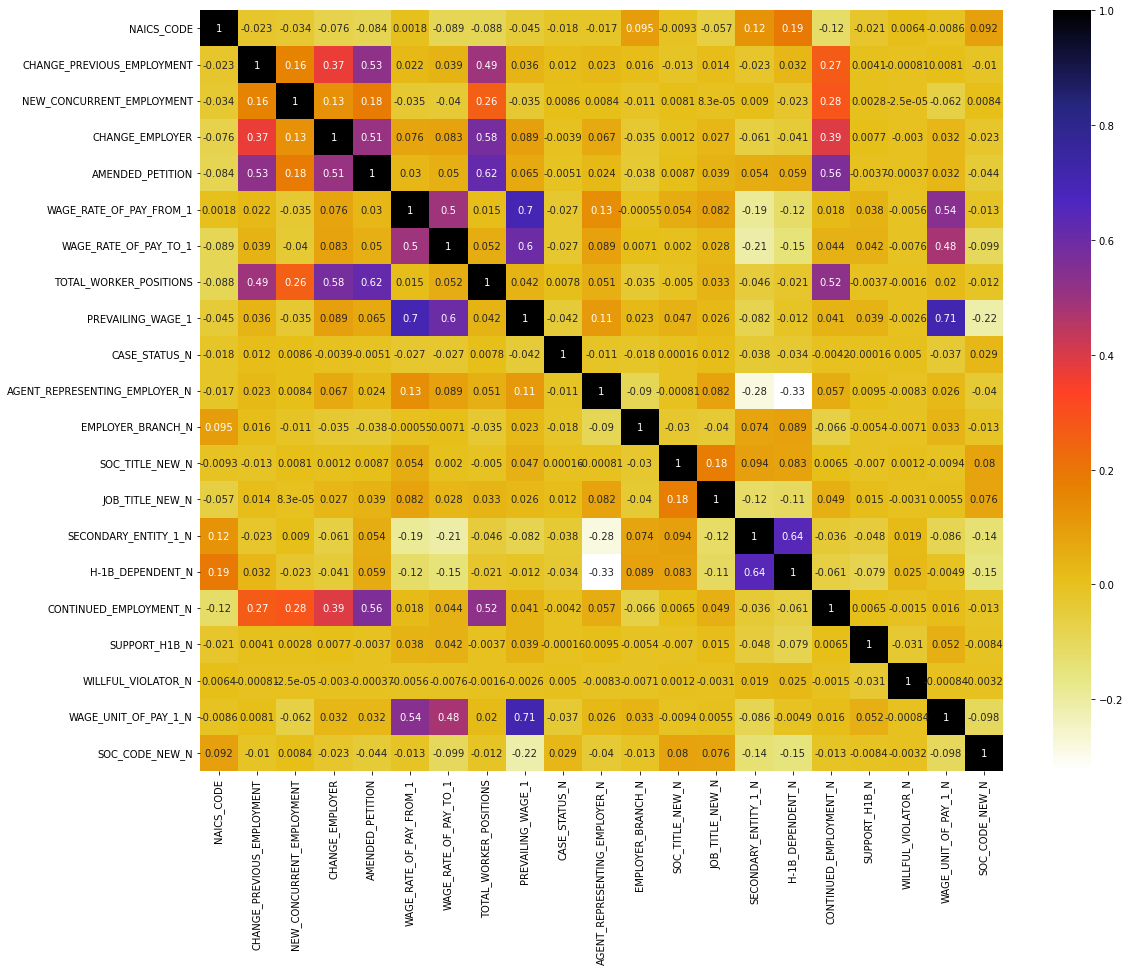

In [82]:
plt.figure(figsize=(18, 14))
correl = H1B_visa.corr()
sns.heatmap(correl, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

# Modelling part

In [83]:
select_columns_for_MNB = ['JOB_TITLE_NEW_N','EMPLOYER_BRANCH_N','SOC_CODE_NEW_N','SOC_TITLE_NEW_N','NAICS_CODE']
H1B_visa_MNB = H1B_visa[select_columns_for_MNB]
#H1B_visa_MNB = H1B_visa[['JOB_TITLE_NEW_N','EMPLOYER_BRANCH_N','SOC_CODE_NEW_N','SOC_TITLE_NEW_N','NAICS_CODE']]
select_column_wage_rate = ['WAGE_RATE_OF_PAY_FROM_1', 'WAGE_RATE_OF_PAY_TO_1','WAGE_UNIT_OF_PAY_1_N','PREVAILING_WAGE_1']
H1B_visa_wage = H1B_visa[select_column_wage_rate]
#H1B_visa_wage = H1B_visa['WAGE_RATE_OF_PAY_FROM_1_N','WAGE_RATE_OF_PAY_TO_1_N','WAGE_UNIT_OF_PAY_1_N','PREVAILING_WAGE_1_N']

In [84]:
X = H1B_visa_MNB
y= H1B_visa['CASE_STATUS_N']

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.4,random_state=42)

In [86]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)


MultinomialNB()

In [87]:
predictions=clf.predict(x_val)

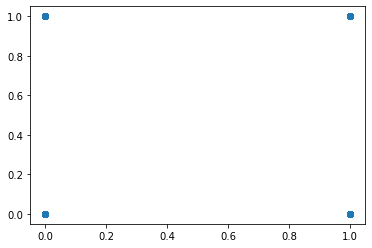

In [88]:
plt.scatter(y_val,predictions)

In [89]:
from sklearn import metrics
metrics.accuracy_score(y_val, predictions)

0.9877761798927964

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

[[166191    438]
 [  1619     30]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    166629
           1       0.06      0.02      0.03      1649

    accuracy                           0.99    168278
   macro avg       0.53      0.51      0.51    168278
weighted avg       0.98      0.99      0.98    168278



In [92]:
# Shuffle the Dataset.
bal_case_status = y.sample(frac=1,random_state=4)
print(H1B_visa['CASE_STATUS_N'].value_counts())
# amount of denied cases 4082 rows.
Denied_case_status = H1B_visa.loc[H1B_visa['CASE_STATUS_N'] == 1]

#Randomly select 4082 observations.
accepted_case_status = H1B_visa.loc[H1B_visa['CASE_STATUS_N'] == 0].sample(n=4082,random_state=42)
normalized_case_status = pd.concat([Denied_case_status,accepted_case_status])

0    416613
1      4082
Name: CASE_STATUS_N, dtype: int64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


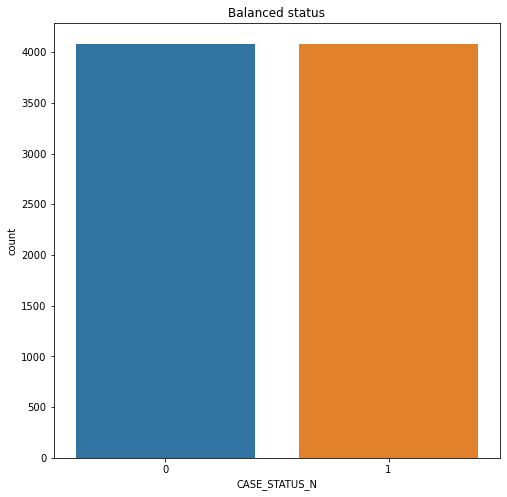

In [93]:
plt.figure(figsize=(8, 8))
sns.countplot('CASE_STATUS_N', data=normalized_case_status)
plt.title('Balanced status')
plt.show()

In [94]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420695 entries, 72 to 664610
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   NAICS_CODE                     420695 non-null  float64
 1   CHANGE_PREVIOUS_EMPLOYMENT     420695 non-null  int64  
 2   NEW_CONCURRENT_EMPLOYMENT      420695 non-null  float64
 3   CHANGE_EMPLOYER                420695 non-null  int64  
 4   AMENDED_PETITION               420695 non-null  int64  
 5   WAGE_RATE_OF_PAY_FROM_1        420695 non-null  float64
 6   WAGE_RATE_OF_PAY_TO_1          420695 non-null  float64
 7   TOTAL_WORKER_POSITIONS         420695 non-null  float64
 8   PREVAILING_WAGE_1              420695 non-null  float64
 9   CASE_STATUS_N                  420695 non-null  int32  
 10  AGENT_REPRESENTING_EMPLOYER_N  420695 non-null  int32  
 11  EMPLOYER_BRANCH_N              420695 non-null  int32  
 12  SOC_TITLE_NEW_N              

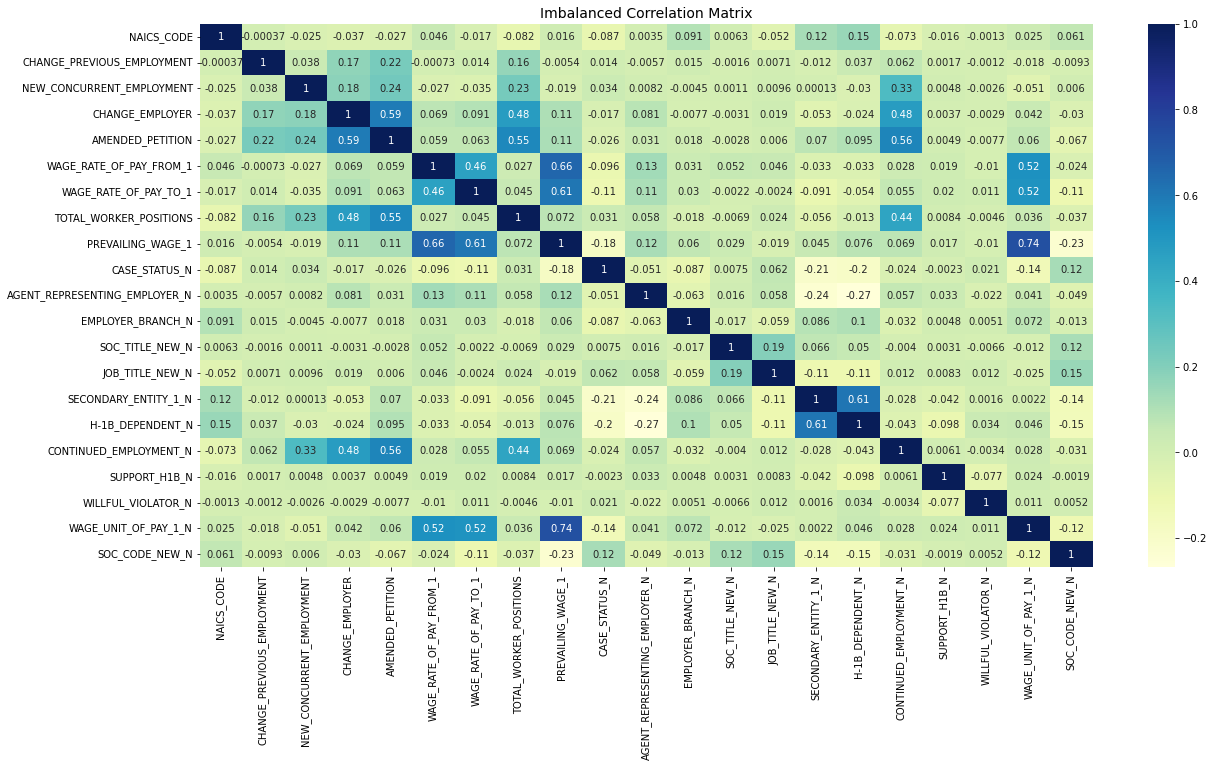

In [95]:
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = normalized_case_status.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax,annot=True)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

In [96]:
!pip install imblearn graphviz xgboost

# Oversampling using smote

In [97]:
from imblearn.over_sampling import SMOTE
seed = 100
k = 1
sm = SMOTE(sampling_strategy='minority', k_neighbors=k, random_state=seed)

x_train, y_train = sm.fit_resample(H1B_visa[select_columns_for_MNB],H1B_visa['CASE_STATUS_N'])
oversampled_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(x_train)], axis=1)

In [98]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [99]:
predictions=clf.predict(x_val)
#plt.scatter(y_val,predictions)

In [100]:
metrics.accuracy_score(y_val, predictions)

0.7012681396260949

In [101]:
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

[[117287  49342]
 [   928    721]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82    166629
           1       0.01      0.44      0.03      1649

    accuracy                           0.70    168278
   macro avg       0.50      0.57      0.43    168278
weighted avg       0.98      0.70      0.82    168278



In [102]:
X1 = H1B_visa_wage
y1= H1B_visa['CASE_STATUS_N']

In [103]:
from sklearn.model_selection import train_test_split
x_train1,x_val1,y_train1,y_val1=train_test_split(X1,y1,test_size=0.4,random_state=42)

In [104]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train1, y_train1)

MultinomialNB()

In [105]:
predictions=clf.predict(x_val1)
#plt.scatter(y_val,predictions)

In [106]:
metrics.accuracy_score(y_val1, predictions)

0.6536742770891025

In [107]:
print(confusion_matrix(y_val1, predictions))
print(classification_report(y_val1, predictions))

[[109320  57309]
 [   970    679]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79    166629
           1       0.01      0.41      0.02      1649

    accuracy                           0.65    168278
   macro avg       0.50      0.53      0.41    168278
weighted avg       0.98      0.65      0.78    168278



In [108]:
from imblearn.over_sampling import SMOTE
seed = 100
k = 1
sm = SMOTE(sampling_strategy='minority', k_neighbors=k, random_state=seed)

x_train1, y_train1 = sm.fit_resample(H1B_visa[select_column_wage_rate],H1B_visa['CASE_STATUS_N'])
oversampled_train = pd.concat([pd.DataFrame(y_train1), pd.DataFrame(x_train1)], axis=1)

In [109]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train1, y_train1)

MultinomialNB()

In [110]:
predictions=clf.predict(x_val1)

In [111]:
metrics.accuracy_score(y_val1, predictions)

0.6556947432225246

In [112]:
print(confusion_matrix(y_val1, predictions))
print(classification_report(y_val1, predictions))

[[109662  56967]
 [   972    677]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79    166629
           1       0.01      0.41      0.02      1649

    accuracy                           0.66    168278
   macro avg       0.50      0.53      0.41    168278
weighted avg       0.98      0.66      0.78    168278



In [113]:
#x_train,x_val,y_train,y_val

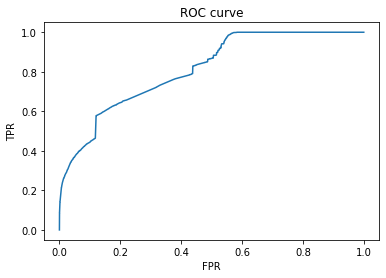

In [114]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict_proba(x_val)
y_pred = model.predict(x_val) 
#print roc_auc_score(y_val, predictions[:,1])

fpr, tpr, _ = roc_curve(y_val, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [115]:
metrics.accuracy_score(y_val, y_pred)

0.877874707329538

In [116]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[146962  19667]
 [   884    765]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    166629
           1       0.04      0.46      0.07      1649

    accuracy                           0.88    168278
   macro avg       0.52      0.67      0.50    168278
weighted avg       0.98      0.88      0.93    168278



In [117]:
from imblearn.over_sampling import SMOTE
seed = 100
k = 1
sm = SMOTE(sampling_strategy='minority', k_neighbors=k, random_state=seed)

x_train, y_train = sm.fit_resample(H1B_visa[select_columns_for_MNB],H1B_visa['CASE_STATUS_N'])
oversampled_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(x_train)], axis=1)

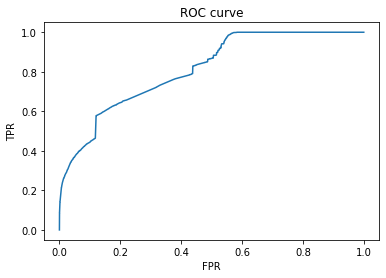

In [118]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict_proba(x_val)
y_pred = model.predict(x_val) 
#print roc_auc_score(y_val, predictions[:,1])

fpr, tpr, _ = roc_curve(y_val, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [119]:
metrics.accuracy_score(y_val, y_pred)

0.877874707329538

In [120]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[146962  19667]
 [   884    765]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    166629
           1       0.04      0.46      0.07      1649

    accuracy                           0.88    168278
   macro avg       0.52      0.67      0.50    168278
weighted avg       0.98      0.88      0.93    168278



No Skill: ROC AUC=50.000
naive bayes Skill: ROC AUC=97.279


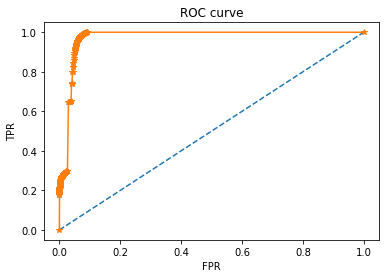

In [128]:
model = tree.DecisionTreeClassifier()
model.fit(x_train1,y_train1)
nsProbability = [0 for _ in range(len(y_val1))]
lsProbability = model.predict_proba(x_val1)
y_pred1 = model.predict(x_val1) 
lsProbability = lsProbability[:, 1]
# calculate scores
nsAUC = roc_auc_score(y_val1, nsProbability)
lrAUC1 = roc_auc_score(y_val1, lsProbability)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('naive bayes Skill: ROC AUC=%.3f' % (lrAUC1*100))
# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_val1, nsProbability)
lrFP, lrTP, _ = roc_curve(y_val1, lsProbability)
plt.clf()
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='naive bayes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [129]:
metrics.accuracy_score(y_val1, y_pred1)

0.96716148278444

In [130]:
print(confusion_matrix(y_val1, y_pred1))
print(classification_report(y_val1, y_pred1))

[[162258   4371]
 [  1155    494]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    166629
           1       0.10      0.30      0.15      1649

    accuracy                           0.97    168278
   macro avg       0.55      0.64      0.57    168278
weighted avg       0.98      0.97      0.98    168278



In [131]:
from imblearn.over_sampling import SMOTE
seed = 100
k = 1
sm = SMOTE(sampling_strategy='minority', k_neighbors=k, random_state=seed)

x_train1, y_train1 = sm.fit_resample(H1B_visa[select_column_wage_rate],H1B_visa['CASE_STATUS_N'])
oversampled_train = pd.concat([pd.DataFrame(y_train1), pd.DataFrame(x_train1)], axis=1)

No Skill: ROC AUC=50.000
naive bayes Skill: ROC AUC=97.279


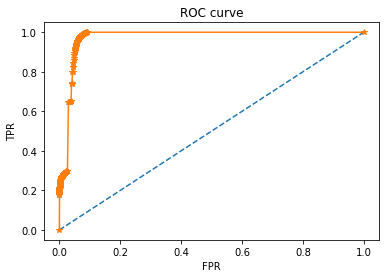

In [132]:
model = tree.DecisionTreeClassifier()
model.fit(x_train1,y_train1)
nsProbability = [0 for _ in range(len(y_val1))]
lsProbability = model.predict_proba(x_val1)
y_pred1 = model.predict(x_val1) 
lsProbability = lsProbability[:, 1]
# calculate scores
nsAUC = roc_auc_score(y_val1, nsProbability)
lrAUC1 = roc_auc_score(y_val1, lsProbability)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('naive bayes Skill: ROC AUC=%.3f' % (lrAUC1*100))
# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_val1, nsProbability)
lrFP, lrTP, _ = roc_curve(y_val1, lsProbability)
plt.clf()
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='naive bayes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [133]:
metrics.accuracy_score(y_val1, y_pred1)

0.96716148278444

In [134]:
print(confusion_matrix(y_val1, y_pred1))
print(classification_report(y_val1, y_pred1))

[[162258   4371]
 [  1155    494]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    166629
           1       0.10      0.30      0.15      1649

    accuracy                           0.97    168278
   macro avg       0.55      0.64      0.57    168278
weighted avg       0.98      0.97      0.98    168278

